<a href="https://colab.research.google.com/github/vishal-pandey/iot-transfer/blob/master/beijing-cnn-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
URL_beijing = "https://github.com/vishal-pandey/iot-transfer/raw/master/pm25_beijing.csv"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
df_beijing = pd.read_csv(URL_beijing)

In [0]:
pm25_beijing = df_beijing.iloc[:, 0].values

In [0]:
pm25_beijing = pm25_beijing.reshape(-1, 1)

In [0]:
scaler_beijing = StandardScaler()
scaler_beijing.fit(pm25_beijing)
pm25_beijing = scaler_beijing.transform(pm25_beijing)

In [0]:
N = 20
O = 5
P = 20

In [0]:
X_beijing = []
y_beijing = []

for i in range(len(pm25_beijing) - (N + O + P)):
  temp = []
  temp1 = pm25_beijing[i : i+N]
  temp2 = [0 for _ in range(O)]
  temp3 = pm25_beijing[i+N+O : i+N+O+P]
  X_beijing.append(np.append(np.append(temp1, temp2), temp3))
  y_beijing.append(pm25_beijing[i+N : i+N+O].reshape(O))

In [0]:
X_beijing = np.array(X_beijing)
y_beijing = np.array(y_beijing)

In [53]:
print(X_beijing.shape)
print(y_beijing.shape)

(41712, 45)
(41712, 5)


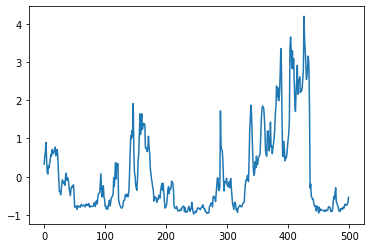

In [55]:
plt.plot(pm25_beijing[:500])
plt.show()

In [0]:
X_beijing_train, X_beijing_test, y_beijing_train, y_beijing_test = train_test_split(X_beijing, y_beijing)

In [0]:
X_beijing_train = X_beijing_train.reshape(X_beijing_train.shape[0], -1, 1)
X_beijing_test = X_beijing_test.reshape(X_beijing_test.shape[0], -1, 1)

In [59]:
from keras.layers import LSTM, Bidirectional, Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

Using TensorFlow backend.


In [60]:
X_beijing_train.shape

(31284, 45, 1)

In [67]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_beijing_train.shape[1],X_beijing_train.shape[2])))
model.add(MaxPooling1D())
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [68]:
model.fit(X_beijing_train, y_beijing_train, epochs=20, validation_data=(X_beijing_test, y_beijing_test))

Train on 31284 samples, validate on 10428 samples
Epoch 1/20
31284/31284 [==============================] - 4s 143us/step - loss: 0.1158 - acc: 0.4309 - val_loss: 0.1052 - val_acc: 0.4441
Epoch 2/20
31284/31284 [==============================] - 4s 131us/step - loss: 0.0937 - acc: 0.4685 - val_loss: 0.0875 - val_acc: 0.4726
Epoch 3/20
31284/31284 [==============================] - 4s 134us/step - loss: 0.0903 - acc: 0.4776 - val_loss: 0.0949 - val_acc: 0.4897
Epoch 4/20
31284/31284 [==============================] - 4s 131us/step - loss: 0.0899 - acc: 0.4820 - val_loss: 0.0840 - val_acc: 0.4970
Epoch 5/20
31284/31284 [==============================] - 4s 129us/step - loss: 0.0888 - acc: 0.4838 - val_loss: 0.0856 - val_acc: 0.4854
Epoch 6/20
31284/31284 [==============================] - 4s 131us/step - loss: 0.0884 - acc: 0.4824 - val_loss: 0.0940 - val_acc: 0.4726
Epoch 7/20
31284/31284 [==============================] - 4s 130us/step - loss: 0.0874 - acc: 0.4855 - val_loss: 0.0838 - 

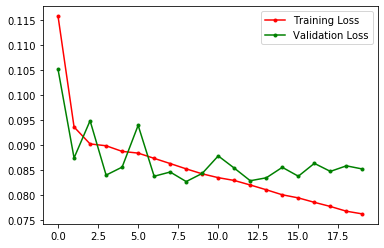

In [69]:
plt.plot(model.history.history['loss'], 'r.-', label="Training Loss")
plt.plot(model.history.history['val_loss'], 'g.-', label="Validation Loss")
plt.legend()
plt.show()

In [0]:
model.save('pm25_beijing_model.h5')